## Algoritmos de Aprendizaje no Supervisado

## k-means clustering

## Tarea 4 - Algoritmo de Aprendizaje no Supervisado - Análisis de Datos

Grupo 91

Presentado a: Ángela Bibiana Ortegón

## Realizar un análisis exploratorio de los datos para identificar 
1. Relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características. 
4. Entrenar el modelo configurando los diferentes 
hiperparámetros. 
5. Evaluar el desempeño del modelo con métricas como 
Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 
6. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo 
7. Interpretar, analizar y documentar los resultados obtenidos. 

In [ ]:
#Cargue de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')


In [13]:
# Cargar los datos
file_path = 'C://Users//Dell//k-means y HC//Mall_Customers.csv'
data = pd.read_csv(file_path)

In [17]:
# Exploración inicial de los datos
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [19]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [21]:
# Limpieza y preprocesamiento
# Eliminar columnas irrelevantes
data_cleaned = data.drop(columns=['CustomerID'])

In [29]:
# Codificar la variable categórica Gender
data_cleaned['Gender'] = data_cleaned['Gender'].map({'Male': 0, 'Female': 1})

In [33]:
# Verificar valores nulos
print(pd.DataFrame(data_normalized).isnull().sum())

0    200
1      0
2      0
3      0
dtype: int64


In [35]:
# Verificar duplicados
print(pd.DataFrame(data_normalized).duplicated().sum())

0


In [37]:
# Comprobar estadísticas después de escalar
print(pd.DataFrame(data_normalized).describe())

         0             1             2             3
count  0.0  2.000000e+02  2.000000e+02  2.000000e+02
mean   NaN -1.021405e-16 -2.131628e-16 -1.465494e-16
std    NaN  1.002509e+00  1.002509e+00  1.002509e+00
min    NaN -1.496335e+00 -1.738999e+00 -1.910021e+00
25%    NaN -7.248436e-01 -7.275093e-01 -5.997931e-01
50%    NaN -2.045351e-01  3.587926e-02 -7.764312e-03
75%    NaN  7.284319e-01  6.656748e-01  8.851316e-01
max    NaN  2.235532e+00  2.917671e+00  1.894492e+00


In [41]:
print(data_cleaned.describe())
print(data_cleaned.std())

       Gender         Age  Annual Income (k$)  Spending Score (1-100)
count     0.0  200.000000          200.000000              200.000000
mean      NaN   38.850000           60.560000               50.200000
std       NaN   13.969007           26.264721               25.823522
min       NaN   18.000000           15.000000                1.000000
25%       NaN   28.750000           41.500000               34.750000
50%       NaN   36.000000           61.500000               50.000000
75%       NaN   49.000000           78.000000               73.000000
max       NaN   70.000000          137.000000               99.000000
Gender                          NaN
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64


In [43]:
# Eliminar columnas constantes
data_cleaned = data_cleaned.loc[:, data_cleaned.std() > 0]

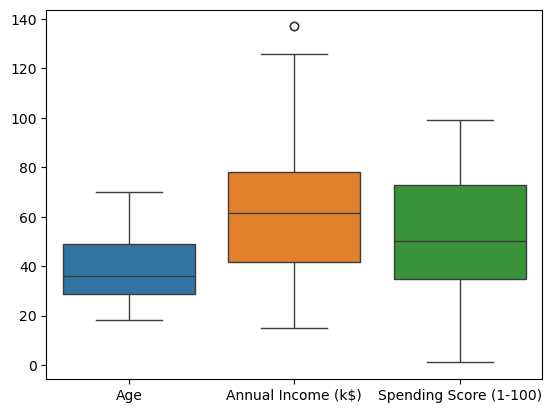

In [45]:
import seaborn as sns
sns.boxplot(data=data_cleaned)
plt.show()

In [47]:
data_cleaned = data_cleaned.clip(lower=data_cleaned.quantile(0.01), 
                                 upper=data_cleaned.quantile(0.99), axis=1)

In [49]:
print(data_cleaned.isnull().sum())

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [51]:
data_cleaned.fillna(data_cleaned.mean(), inplace=True)

In [53]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_cleaned)
print(pd.DataFrame(data_normalized).describe())

                  0             1             2
count  2.000000e+02  2.000000e+02  2.000000e+02
mean   3.552714e-17  2.842171e-16  2.042810e-16
std    1.002509e+00  1.002509e+00  1.002509e+00
min   -1.497969e+00 -1.718037e+00 -1.837961e+00
25%   -7.252678e-01 -7.325155e-01 -6.014940e-01
50%   -2.041440e-01  4.013942e-02 -7.974567e-03
75%    7.302850e-01  6.775798e-01  8.871696e-01
max    2.168587e+00  2.536201e+00  1.821622e+00


In [59]:
# -----------------------------
# K-MEANS CLUSTERING
# -----------------------------
# Probar diferentes valores de k
k_values = range(2, 11)
inertia = []
silhouette_scores_kmeans = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(data_normalized, kmeans.labels_))

Text(0, 0.5, 'Inercia')

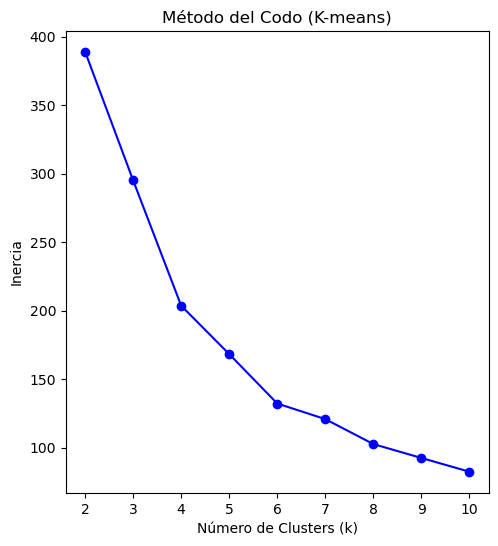

In [61]:
# Método del codo y coeficiente de Silhouette
plt.figure(figsize=(12, 6))
# Método del codo
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o', color='blue')
plt.title('Método del Codo (K-means)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')

# Coeficiente de Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_kmeans, marker='o', color='green')
plt.title('Coeficiente de Silhouette (K-means)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [112]:
# Elegir el número óptimo de clusters (máximo Silhouette)
optimal_k = k_values[silhouette_scores_kmeans.index(max(silhouette_scores_kmeans))]
print(f"El número óptimo de clusters (K-means) es: {optimal_k}")

El número óptimo de clusters (K-means) es: 6


In [107]:
# Entrenar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_normalized)
data_cleaned['Cluster_Kmeans'] = kmeans.labels_

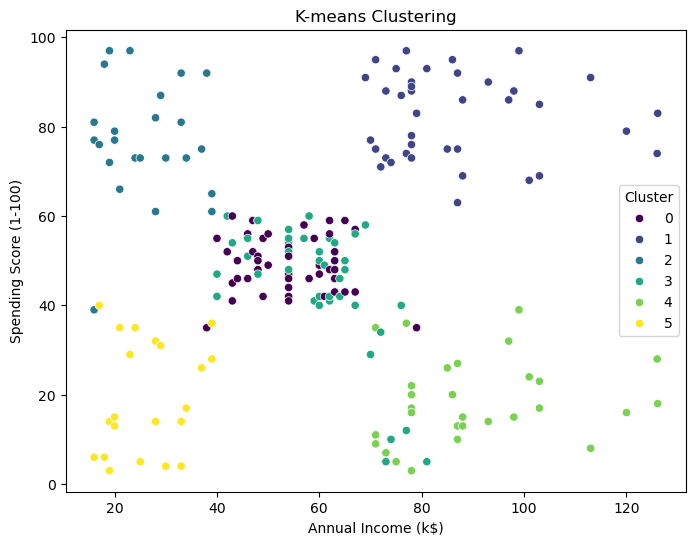

In [69]:
# Visualización de K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned['Annual Income (k$)'], 
                y=data_cleaned['Spending Score (1-100)'], 
                hue=data_cleaned['Cluster_Kmeans'], palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()